

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 128)           128000    
                                                                 
 spatial_dropout1d (Spatial  (None, 10, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 10, 128)           131584    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                      

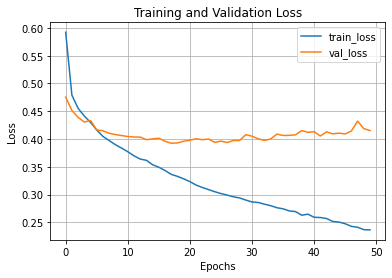

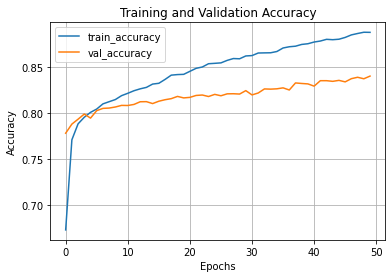

['word', 'i', 'love', 'all']
1/1 [==============================] - 1s 530ms/step
[[0.9988257 0.0011743]]
0


In [ ]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, LSTM, Input, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences


text = pd.read_csv('twitter_data.csv')
text = text.iloc[:, [2, 3]]
text.columns = ['nature', 'texts']

text = text[['nature', 'texts']]
text = text.dropna(subset=['texts'])
text['texts'] = text['texts'].astype(str)

text_true = text[text['nature'] == 'Positive']['texts']
text_false = text[text['nature'] == 'Negative']['texts']
text_n = text[(text['nature'] != 'Positive') & (text['nature'] != 'Negative')]['texts']

text = pd.concat([text_true, text_false], ignore_index=True)

maxWordsCount = 1000
tokenizer = Tokenizer(num_words=maxWordsCount,
                      filters='!–"—#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»',
                      lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(text)

dist = list(tokenizer.word_counts.items())

max_text_len = 10
data = tokenizer.texts_to_sequences(text)
data_pad = pad_sequences(data, maxlen=max_text_len)

count_true = len(text_true)
count_false = len(text_false)

X = data_pad
Y = np.array([[1, 0]]*count_true + [[0, 1]]*count_false)

indices = np.random.choice(X.shape[0], size=X.shape[0], replace=False)

X = X[indices]
Y = Y[indices]

model = Sequential()
model.add(Embedding(maxWordsCount, 128, input_length=max_text_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(0.0001))

model.summary()

history = model.fit(X, Y, batch_size=32, epochs=50, validation_split=0.2)

# Графіки функції втрат і точності
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

def sequence_to_text(list_of_indices):
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

t = "Word! I love all".lower()
data = tokenizer.texts_to_sequences([t])
data_pad = pad_sequences(data, maxlen=max_text_len)
print(sequence_to_text(data[0]))

res = model.predict(data_pad)
print(res, np.argmax(res), sep='\n')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 128)           128000    
                                                                 
 spatial_dropout1d (Spatial  (None, 10, 128)           0         
 Dropout1D)                                                      
                                                                 
 gru (GRU)                   (None, 10, 128)           99072     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                      

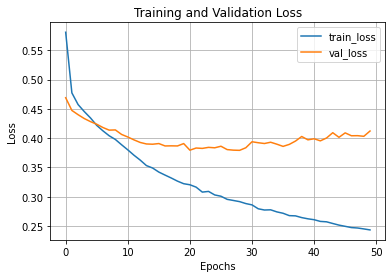

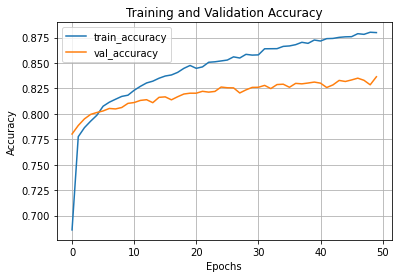

['word', 'i', 'love', 'all']
1/1 [==============================] - 2s 2s/step
[[0.99834275 0.00165729]]
0


In [ ]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, LSTM, Input, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences


text = pd.read_csv('twitter_data.csv')
text = text.iloc[:, [2, 3]]
text.columns = ['nature', 'texts']

text = text[['nature', 'texts']]
text = text.dropna(subset=['texts'])
text['texts'] = text['texts'].astype(str)

text_true = text[text['nature'] == 'Positive']['texts']
text_false = text[text['nature'] == 'Negative']['texts']
text_n = text[(text['nature'] != 'Positive') & (text['nature'] != 'Negative')]['texts']

text = pd.concat([text_true, text_false], ignore_index=True)

maxWordsCount = 1000
tokenizer = Tokenizer(num_words=maxWordsCount,
                      filters='!–"—#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»',
                      lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(text)

dist = list(tokenizer.word_counts.items())

max_text_len = 10
data = tokenizer.texts_to_sequences(text)
data_pad = pad_sequences(data, maxlen=max_text_len)

count_true = len(text_true)
count_false = len(text_false)

X = data_pad
Y = np.array([[1, 0]]*count_true + [[0, 1]]*count_false)

indices = np.random.choice(X.shape[0], size=X.shape[0], replace=False)

X = X[indices]
Y = Y[indices]

model = Sequential()
model.add(Embedding(maxWordsCount, 128, input_length=max_text_len))
model.add(SpatialDropout1D(0.2))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(0.0001))

history = model.fit(X, Y, batch_size=32, epochs=50, validation_split=0.2)

# Графіки функції втрат і точності
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

def sequence_to_text(list_of_indices):
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

t = "Word! I love all".lower()
data = tokenizer.texts_to_sequences([t])
data_pad = pad_sequences(data, maxlen=max_text_len)
print(sequence_to_text(data[0]))

res = model.predict(data_pad)
print(res, np.argmax(res), sep='\n')


In [ ]:
reverse = dict(map(reversed, tokenizer.word_index.items()))

def sequence_to_text(list_of_indices):
    words = [reverse.get(letter) for letter in list_of_indices]
    return(words)

t = 'The weather today is absolutely beautiful!'.lower()

data = tokenizer.texts_to_sequences([t])
data_1 = pad_sequences(data, maxlen=max_text_len)
print( sequence_to_text(data[0]) )

res = model.predict(data_1)
print ('res', res)

if np.argmax(res) == 0:
    print("Result. The text is positive.")
else:
    print("Result. The text is negative.")

['the', 'today', 'is', 'absolutely', 'beautiful']
1/1 [==============================] - 0s 300ms/step
res [[9.9996173e-01 3.8241840e-05]]
Result. The text is positive.


In [ ]:
t1= 'My car broke down on the way to work, what a disaster!'.lower()

data = tokenizer.texts_to_sequences([t1])
data_2 = pad_sequences(data, maxlen=max_text_len)
print( sequence_to_text(data[0]) )

res = model.predict(data_2)
print ('res', res)

if np.argmax(res) == 0:
    print("Result. The text is positive.")
else:
    print("Result. The text is negative.")


['my', 'car', 'broke', 'down', 'on', 'the', 'way', 'to', 'work', 'what', 'a']
1/1 [==============================] - 0s 130ms/step
res [[2.6009018e-05 9.9997401e-01]]
Result. The text is negative.
